# Lightmapper

In [1]:
from pathlib import Path
import os

from data_structures.mesh import Mesh
from data_structures.entity import Entity
from data_structures.scene import Scene
from data_structures.color import Color
from data_structures.vector3f import Vector3f as vec

from renderer import Renderer
from lightmapper import Lightmapper

### Lightmapper configuration

In [2]:
# --- USER CONFIGURATION REQUIRED ---
map_filename = 'test_map_open'          # name of the converted TrenchBroom .obj file, map-files are expected to be under './maps'
scene_filenames = 'test_scene_test'     # name under which the genrated scene will be saved (including the lightmap)

patches_resolution = 0.0625         # number of pathces per worldspace unit -> directly affects lightmap resolution (recomended to use power of 2's like 0.25, 0.125, 0.0625)
iterations = 4                       # number of light-bounces
atmosphere_color=Color(0, 0, 0)         # indirect atmospheric emission (it is recomended to choose very small values in the range of 0-0.01)
hemicube_resolution = 64                # resolution of the hemicubes (defined as the front face res.), lower res. may result abrupt emissive changes
#--- USER CONFIGURATION REQUIRED ---s

In [3]:
base_path = Path(os.getcwd())
map_path = Path(base_path / 'maps' / (map_filename + '.obj'))
scene_path = Path(base_path / 'lightmaps' / (scene_filenames + '.json'))
lightmap_path = Path(base_path / 'lightmaps' / (scene_filenames + '.hdr'))

### Setup the Entities and generate the Scene

In [4]:
# --- USER CONFIGURATION REQUIRED ---
# Create the meshes
mesh_main = Mesh().from_object(map_path)    # this mesh will be the loaded map file
mesh_light_1 = Mesh().from_cube()           # additionally defnie some lights to ligth up the scene by creating cubes as emissive objects
mesh_light_2 = Mesh().from_cube() 
# Convert Meshes into Entities and assign them worldspace transforms (position, rotation, scale, base_color, emissive_color)
entity_main = Entity(mesh_main, vec(0, 0, 0), vec(0, 0, 0), vec(1, 1, 1), Color(1, 1, 1), Color(0.0, 0.0, 0.0))
entity_light = Entity(mesh_light_1, vec(-2000, -1000, 2000), vec(0, 0, 0), vec(256, 256, 256), Color(1, 1, 1), Color(0.75, 0.75, 0.75))
#--- USER CONFIGURATION REQUIRED ---

# Generate the Scene using the created entities
scene = Scene().create(entities=[entity_main, entity_light], patches_resolution=patches_resolution).save(scene_path)

Generating patches: 100%|██████████| 42436/42436 [00:13<00:00, 3114.44it/s]


### Lightmap computation

Iteration 4/4: 100%|██████████| 9616/9616 [00:12<00:00, 761.72it/s]


Image dimensions: (206, 206, 3)
Image data type: float32
Min pixel value: 0.0
Max pixel value: 0.75
Saved image as debug_lightmap.png


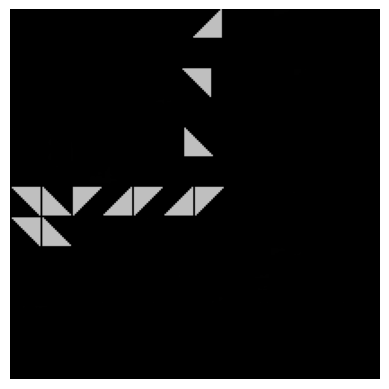

In [5]:
# create the renderer to be used by the ligthmapper
lightmap_renderer = Renderer(
    width=hemicube_resolution, 
    height=hemicube_resolution, 
    scene=scene, 
    atmosphere_color=atmosphere_color, 
    lightmap_mode=True
)
# initialize the lightmapper with the scene and the renderer
lightmapper = Lightmapper(scene=scene, renderer=lightmap_renderer)
# generate the lightmaps and free up allocated space after the generation is complete
lightmapper.generate_lightmap(lightmap_path=lightmap_path, iterations=iterations)
lightmap_renderer.destroy()

# Lightmap Visualizer

In [1]:
from pathlib import Path
import os

from data_structures.scene import Scene
from data_structures.color import Color

from renderer import Renderer
from lightmapper import Lightmapper

In [2]:
# --- USER CONFIGURATION REQUIRED ---          
scene_filenames = 'room'         # choose the scene and the lightmap to be loaded
viewport_width = 1920                       # width of the viewport in pixels
viewport_height = 1080                      # height of the viewport in pixels
atmosphere_color = Color(0.2, 0.6, 0.0)     # Color of the atmosphere, has no effect on lighting
# --- USER CONFIGURATION REQUIRED ---

#assets_path = Path('/home/devbox/Bayernstein/assets')
#assets_path = Path('D:/data/Informatik/GamesEngineering/Bayernstein/assets')
assets_path = Path('/Users/fabiandepaoli/Library/Mobile Documents/com~apple~CloudDocs/SharedData/HM/GamesEngineering/Bayernstein/assets')
#compiled_path = Path('/home/devbox/Bayernstein/assets/compiled')
#compiled_path = Path('D:/data/Informatik/GamesEngineering/Bayernstein/assets/compiled')
compiled_path = Path('/Users/fabiandepaoli/Library/Mobile Documents/com~apple~CloudDocs/SharedData/HM/GamesEngineering/Bayernstein/assets/compiled')
scene_path = compiled_path / scene_filenames / f'{scene_filenames}.json'
lightmap_path = compiled_path / scene_filenames / f'{scene_filenames}.hdr'
scene = Scene(scene_path, assets_path, lightmap_path).generate_vertex_array()

renderer = Renderer(
    width=viewport_width, 
    height=viewport_height, 
    scene=scene, 
    atmosphere_color=atmosphere_color, 
    lightmap_mode=False, 
)

renderer.run()
renderer.destroy()

2024-11-18 10:36:07.522 python[7706:4558875] +[IMKClient subclass]: chose IMKClient_Modern
